# Feed Forward Neural Networks

In [ ]:
# jupyter notebook

In [ ]:
### 210701~210711, 210821~210831 검증기간(총 22일간)

In [10]:
pip install seaborn


  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense

import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [11]:
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
import seaborn as sns

In [22]:
# cd C:\weather\v_rota\data\all

C:\weather\v_rota\data\all


In [23]:
# forders_all = os.listdir()
# forders_all

['table_202001.csv',
 'table_202002.csv',
 'table_202003.csv',
 'table_202004.csv',
 'table_202005.csv',
 'table_202006.csv',
 'table_202007.csv',
 'table_202008.csv',
 'table_202009.csv',
 'table_202010.csv',
 'table_202011.csv',
 'table_202012.csv',
 'table_202101.csv',
 'table_202102.csv',
 'table_202103.csv',
 'table_202104.csv',
 'table_202105.csv',
 'table_202106.csv',
 'table_202107.csv',
 'table_202108.csv',
 'table_202109.csv',
 'table_202110.csv',
 'table_202111.csv',
 'table_202112.csv']

In [24]:
# # 새로운 데이터 프레임 생성
# al = pd.DataFrame()

# for files in forders_all:
#     df= pd.read_csv(files)
#     al = pd.concat([al, df])

In [25]:
# al.isnull().any()

YearMonthDayHourMinute    False
STN                       False
Lon                       False
Lat                       False
isitu-LST                 False
Band1                     False
Band2                     False
Band3                     False
Band4                     False
Band5                     False
Band6                     False
Band7                     False
Band8                     False
Band9                     False
Band10                    False
Band11                    False
Band12                    False
Band13                    False
Band14                    False
Band15                    False
Band16                    False
30daysBand3               False
30daysBand13              False
GK2A-LST                  False
SolarZA                   False
SateZA                    False
ESR                       False
Height                    False
LandType                  False
insitu-TA                 False
insitu-HM                 False
insitu-T

# Train+Val

In [3]:
cd C:\weather\v_rota\data\train_val

C:\weather\v_rota\data\train_val


In [4]:
forders_tr = os.listdir()
forders_tr

['roltable_202001.csv',
 'roltable_202002.csv',
 'roltable_202003.csv',
 'roltable_202004.csv',
 'roltable_202005.csv',
 'roltable_202006.csv',
 'roltable_202007.csv',
 'roltable_202008.csv',
 'roltable_202009.csv',
 'roltable_202010.csv',
 'roltable_202011.csv',
 'roltable_202012.csv',
 'roltable_202101.csv',
 'roltable_202102.csv',
 'roltable_202103.csv',
 'roltable_202104.csv',
 'roltable_202105.csv',
 'roltable_202106.csv',
 'roltable_202107.csv',
 'roltable_202108.csv',
 'roltable_202109.csv',
 'roltable_202110.csv',
 'roltable_202111.csv',
 'roltable_202112.csv']

In [5]:
# 새로운 데이터 프레임 생성
train = pd.DataFrame()

for files in forders_tr:
    df= pd.read_csv(files)
    train = pd.concat([train, df])

In [6]:
train

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,SolarZA,SateZA,ESR,Height,LandType,...,insitu-TED5.0_new,insitu-PA_new,insitu-PS_new,mean_6_23_new,mean_34_37_new,mean_38_39_new,mean_40_42_new,mean_43_44_new,NDVI_new,NDWI_new
0,202001010000,90,128.56473,38.25085,-2.6,162.63634,44.52481,-9.38141,17.53,2,...,-999.0,1025.2,1027.5,0.583554,-999.000000,-999.000000,-999.0,0.990591,-0.333333,-999.000000
1,202001010010,90,128.56473,38.25085,-2.5,163.55127,44.52481,-9.38141,17.53,2,...,-999.0,1025.2,1027.5,0.583613,-999.000000,-999.000000,-999.0,0.990591,1.000000,-1.000000
2,202001010020,90,128.56473,38.25085,-2.7,164.22845,44.52481,-9.38141,17.53,2,...,-999.0,1024.9,1027.2,0.583406,-999.000000,-999.000000,-999.0,0.990301,-7.206897,-1.000000
3,202001010030,90,128.56473,38.25085,-2.7,164.63608,44.52481,-9.38141,17.53,2,...,-999.0,1024.9,1027.2,0.583700,-999.000000,-999.000000,-999.0,0.990301,-7.000000,-0.273743
4,202001010040,90,128.56473,38.25085,-2.7,164.57039,44.52481,-9.38141,17.53,2,...,-999.0,1025.0,1027.3,0.584239,-999.000000,-999.000000,-999.0,0.990398,-0.881423,-0.273743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432625,202112312310,980,126.48951,33.26062,4.6,156.32571,38.90221,-8.90444,141.84,2,...,-999.0,-999.0,-999.0,0.545212,0.343324,0.715104,-999.0,-999.000000,0.200000,0.065574
432626,202112312320,980,126.48951,33.26062,4.6,158.27716,38.90221,-8.90444,141.84,2,...,-999.0,-999.0,-999.0,0.548474,0.343324,0.715104,-999.0,-999.000000,-0.328358,0.065574
432627,202112312330,980,126.48951,33.26062,4.6,160.18095,38.90221,-8.90444,141.84,2,...,-999.0,-999.0,-999.0,0.551336,0.343324,0.717519,-999.0,-999.000000,-1.666667,-1.000000
432628,202112312340,980,126.48951,33.26062,4.5,162.02095,38.90221,-8.90444,141.84,2,...,-999.0,-999.0,-999.0,0.552635,0.343324,0.715104,-999.0,-999.000000,2.333333,-1.000000


correlation

In [7]:
# outlier 제거
mask = train.isin([-999.0])
train1 = train[~mask]
# df2 = df1.drop([])
train1.describe()

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,SolarZA,SateZA,ESR,Height,LandType,...,insitu-TED5.0_new,insitu-PA_new,insitu-PS_new,mean_6_23_new,mean_34_37_new,mean_38_39_new,mean_40_42_new,mean_43_44_new,NDVI_new,NDWI_new
count,1.057747e+07,1.057747e+07,1.057747e+07,1.057747e+07,1.057747e+07,1.057747e+07,1.057747e+07,1.057747e+07,1.057747e+07,1.057747e+07,...,1.405336e+06,9.884119e+06,9.884119e+06,1.055699e+07,3.827513e+06,2.310775e+06,1.507047e+06,9.884119e+06,1.054217e+07,1.044825e+07
mean,2.020541e+11,2.609966e+02,1.277066e+02,3.608336e+01,1.523222e+01,8.883889e+01,4.208031e+01,-1.071938e-02,1.002695e+02,2.220242e+00,...,1.621375e+01,1.004520e+03,1.016569e+03,5.931017e-01,4.675934e-01,6.108731e-01,4.800256e-01,9.823514e-01,4.533630e-01,1.147350e-01
std,5.005843e+07,2.115371e+02,9.968291e-01,1.229177e+00,1.163428e+01,3.796325e+01,1.390408e+00,5.428358e+00,1.166535e+02,7.199981e-01,...,2.231828e+00,1.608292e+01,8.261672e+00,5.311921e-02,2.328377e-01,2.128291e-01,4.109767e-01,8.662206e-03,9.750077e+00,1.830758e+00
min,2.020010e+11,9.000000e+01,1.247124e+02,3.324616e+01,-4.900000e+00,9.843530e+00,3.887646e+01,-9.630860e+00,1.410000e+00,0.000000e+00,...,-3.740000e+01,5.836000e+02,5.838000e+02,4.268882e-01,-5.939024e-01,-4.236453e-01,-1.000000e+00,5.705220e-01,-1.956000e+02,-1.814000e+02
25%,2.020062e+11,1.400000e+02,1.269195e+02,3.517294e+01,5.300000e+00,5.849575e+01,4.104849e+01,-4.793730e+00,3.600000e+01,2.000000e+00,...,1.460000e+01,9.983000e+02,1.010400e+03,5.590528e-01,2.877567e-01,4.646865e-01,5.076040e-01,9.786912e-01,-1.946309e-01,-4.104443e-01
50%,2.020121e+11,2.170000e+02,1.276914e+02,3.600530e+01,1.510000e+01,8.841574e+01,4.201433e+01,1.511100e-01,6.593000e+01,2.000000e+00,...,1.630000e+01,1.006900e+03,1.016800e+03,5.767256e-01,5.218992e-01,6.353471e-01,5.879668e-01,9.837441e-01,1.041517e-01,-5.359994e-02
75%,2.021061e+11,2.680000e+02,1.285728e+02,3.715928e+01,2.360000e+01,1.197686e+02,4.327835e+01,4.850140e+00,1.402000e+02,3.000000e+00,...,1.780000e+01,1.014700e+03,1.022800e+03,6.280473e-01,6.644462e-01,7.944231e-01,6.568775e-01,9.880243e-01,3.291072e-01,1.293205e-01
max,2.021123e+11,9.800000e+02,1.308986e+02,3.825085e+01,7.010000e+01,1.700479e+02,4.452481e+01,9.025490e+00,7.724300e+02,4.000000e+00,...,6.240000e+01,1.037300e+03,1.041500e+03,9.546242e-01,1.000000e+00,1.000000e+00,8.787879e-01,1.000000e+00,6.570000e+02,3.430000e+02


In [19]:
cd C:\weather\v_rota\

C:\weather\v_rota


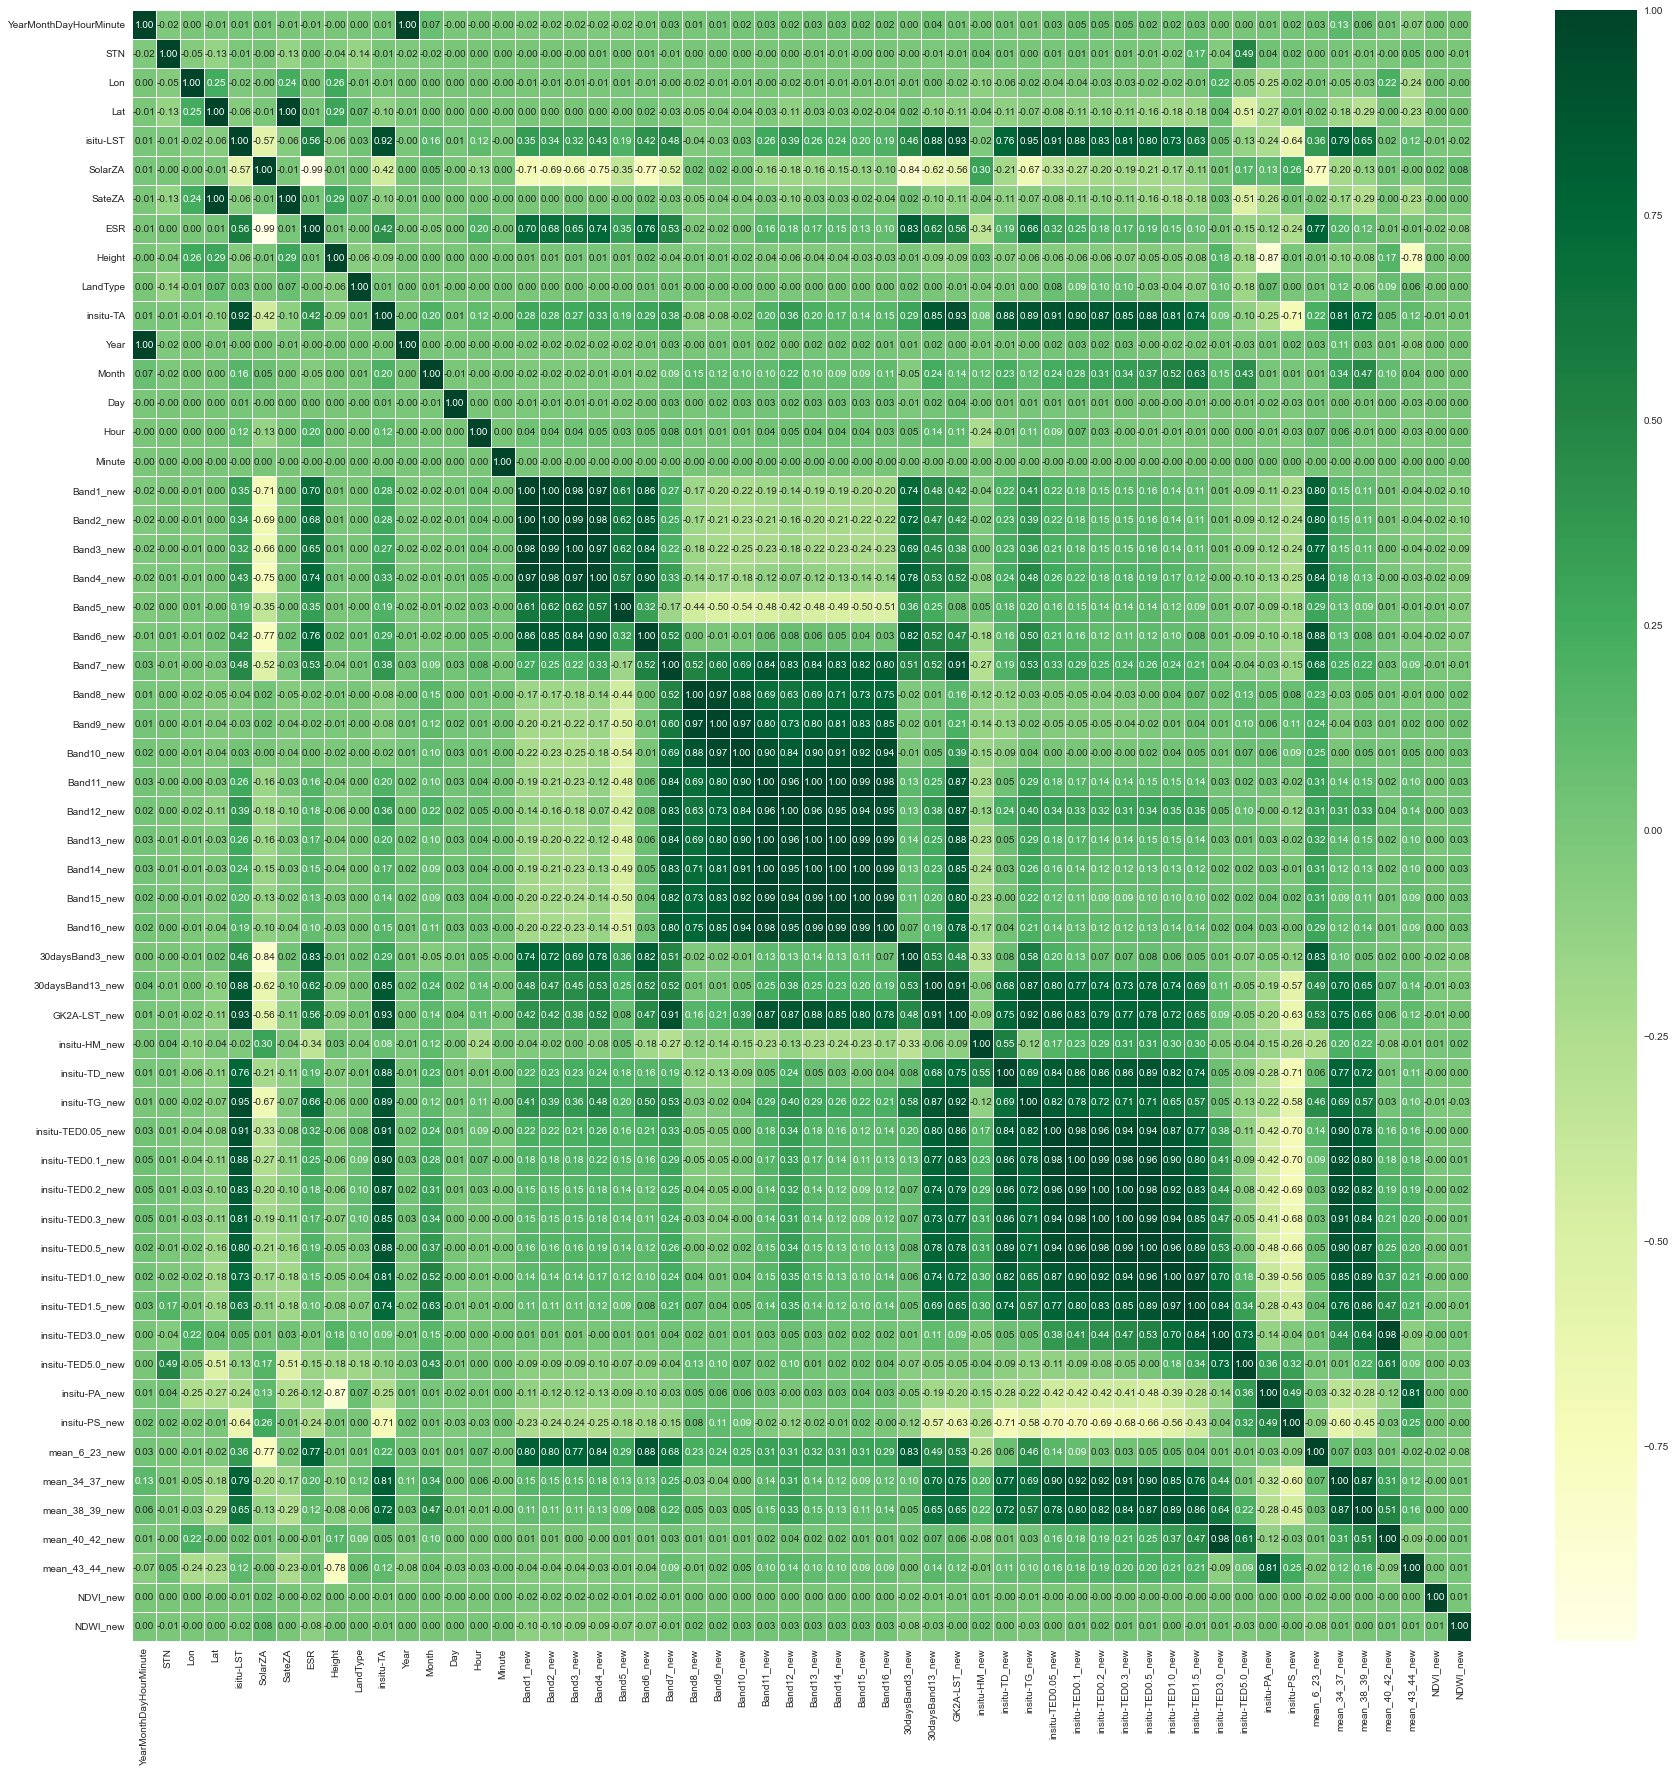

In [13]:
plt.figure(figsize=(30,30))
plt.style.use('seaborn')
sns.heatmap(data = train1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='YlGn')
plt.savefig('corr_lst_ta.png')

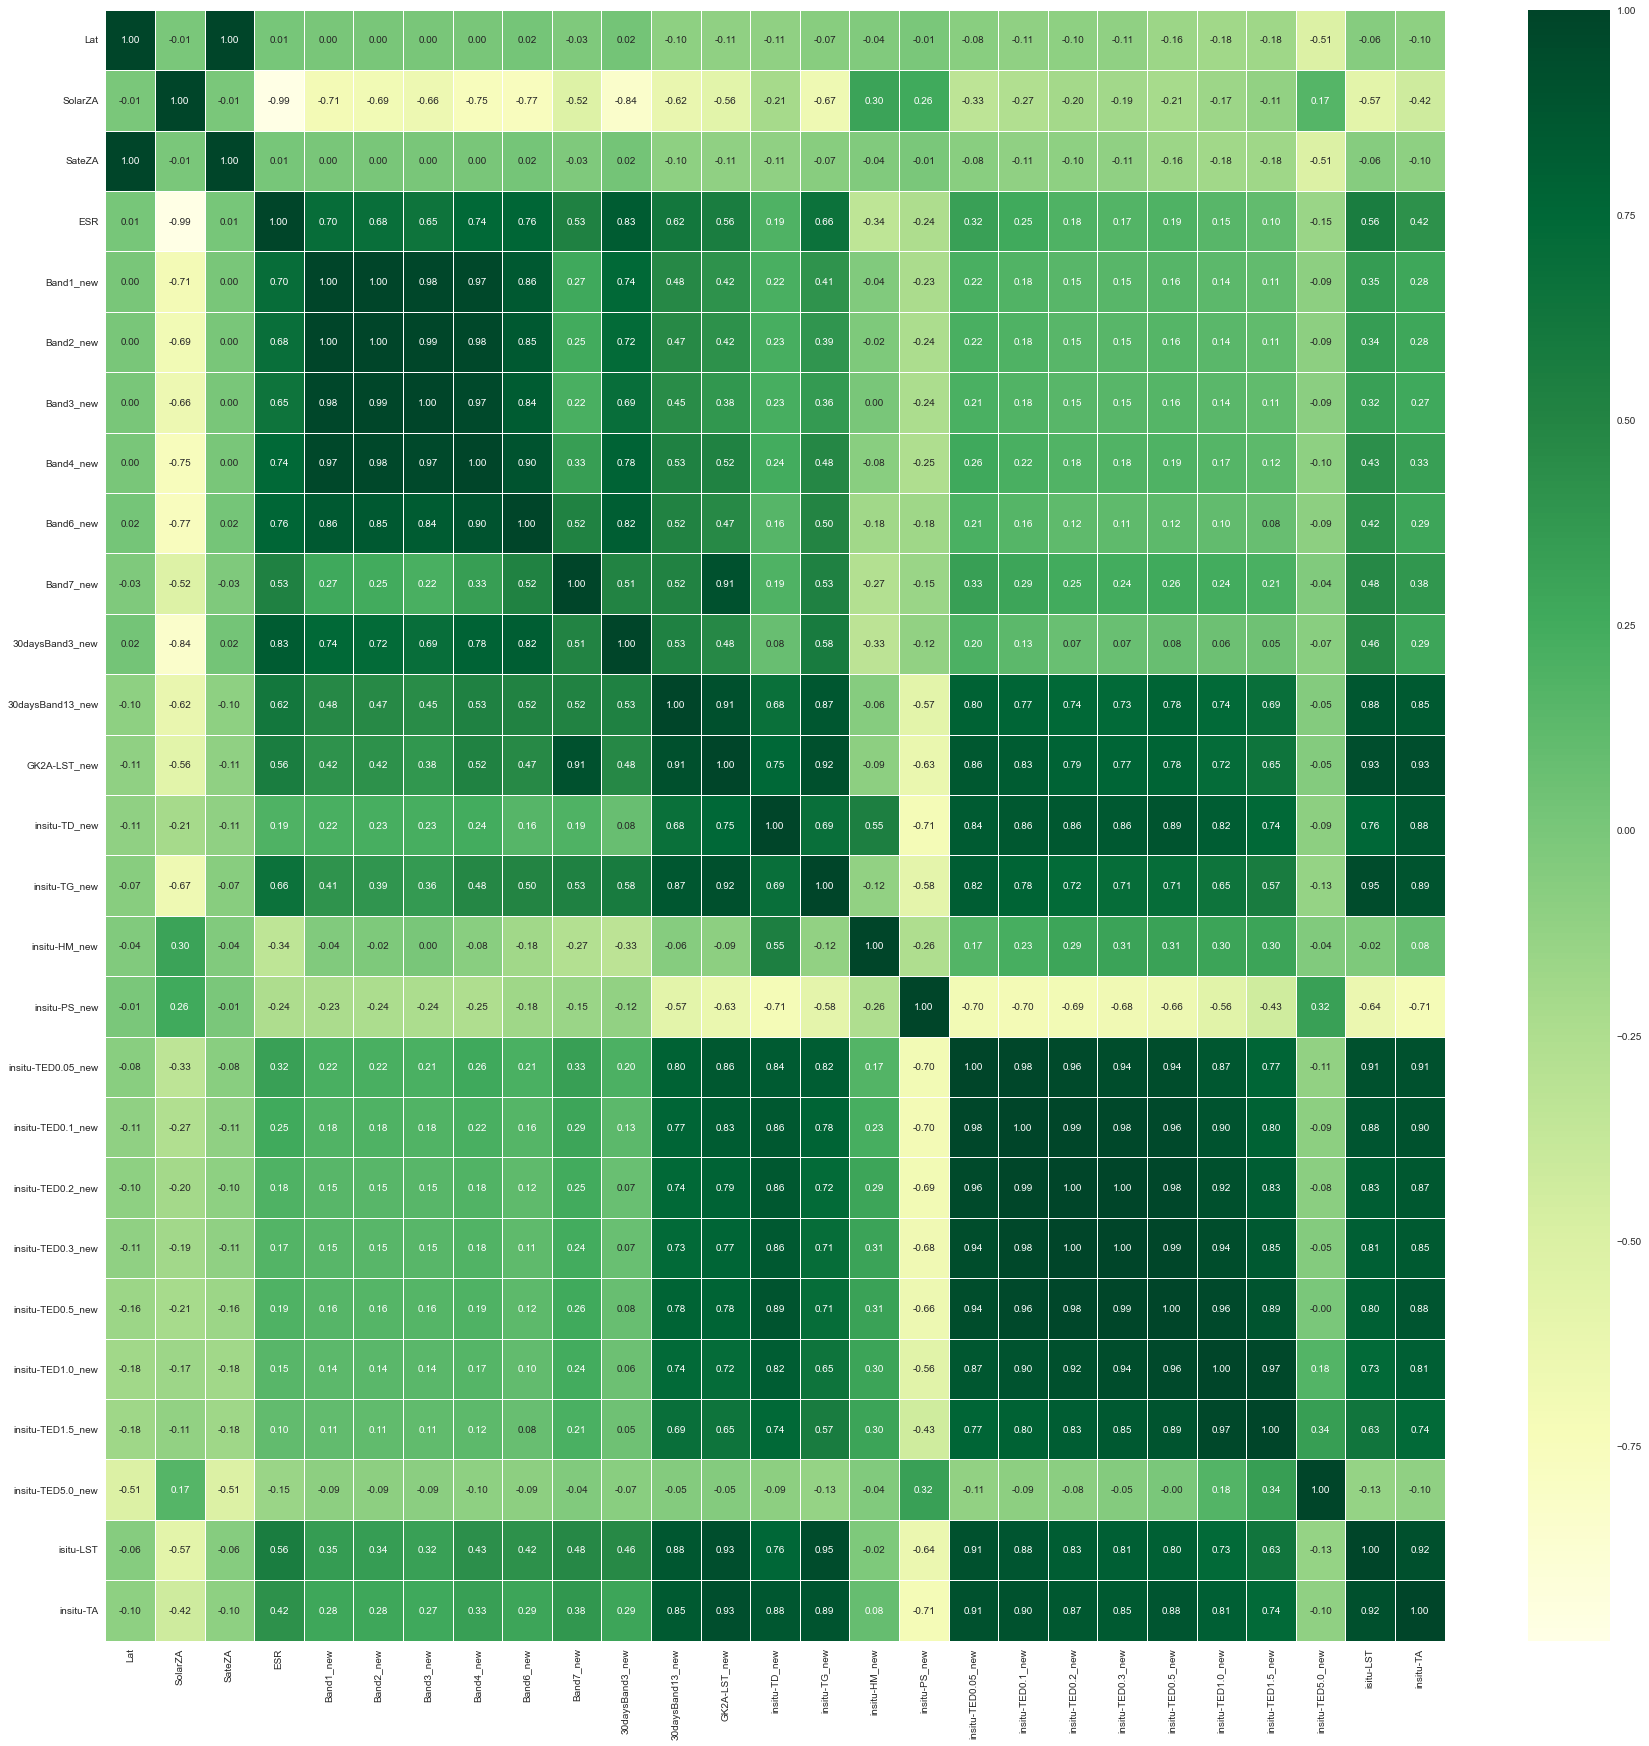

In [17]:
# 해당 피쳐만
plt.figure(figsize=(30,30))
plt.style.use('seaborn')
sns.heatmap(data = train1[['Lat','SolarZA','SateZA','ESR','Band1_new','Band2_new','Band3_new','Band4_new','Band6_new','Band7_new', \
                '30daysBand3_new','30daysBand13_new','GK2A-LST_new','insitu-TD_new','insitu-TG_new',\
                'insitu-HM_new','insitu-PS_new','insitu-TED0.05_new','insitu-TED0.1_new','insitu-TED0.2_new',\
                'insitu-TED0.3_new','insitu-TED0.5_new','insitu-TED1.0_new','insitu-TED1.5_new','insitu-TED5.0_new', 'isitu-LST', 'insitu-TA']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='YlGn')
plt.savefig('corr_core.png')

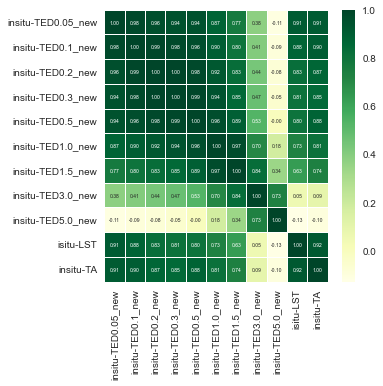

In [27]:
# 지중온도
plt.figure(figsize=(5,5))
plt.style.use('seaborn')
sns.heatmap(data = train1[['insitu-TED0.05_new','insitu-TED0.1_new','insitu-TED0.2_new',\
                'insitu-TED0.3_new','insitu-TED0.5_new','insitu-TED1.0_new','insitu-TED1.5_new','insitu-TED3.0_new','insitu-TED5.0_new', \
                           'isitu-LST', 'insitu-TA']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='YlGn', annot_kws={"size": 5})
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
plt.savefig('corr_ted.png')

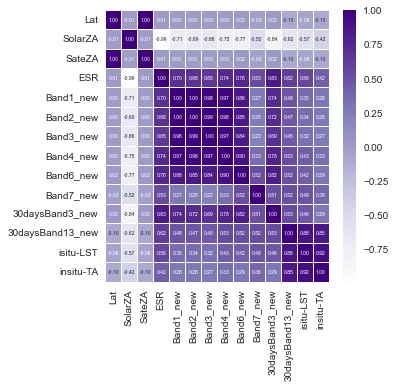

In [28]:
# 밴드
plt.figure(figsize=(5,5))
plt.style.use('seaborn')
sns.heatmap(data = train1[['Lat','SolarZA','SateZA','ESR','Band1_new','Band2_new','Band3_new','Band4_new','Band6_new','Band7_new', \
                '30daysBand3_new','30daysBand13_new', 'isitu-LST', 'insitu-TA']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Purples', annot_kws={"size": 5})
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
plt.savefig('corr_band.png')

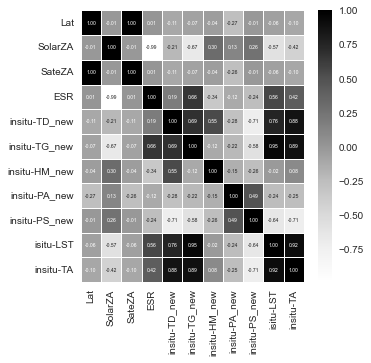

In [29]:
# 나머지
plt.figure(figsize=(5,5))
plt.style.use('seaborn')
sns.heatmap(data = train1[['Lat','SolarZA','SateZA','ESR','insitu-TD_new','insitu-TG_new',\
                'insitu-HM_new','insitu-PA_new','insitu-PS_new','isitu-LST', 'insitu-TA']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Greys', annot_kws={"size": 5})
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
plt.savefig('corr_ins.png')

In [ ]:
## 검정배경으로 저장되면 -> 그림판 이용

# Validation

In [13]:
# cd C:\weather\v4\data\val

In [14]:
# forders_val = os.listdir()
# forders_val

In [15]:
# # 새로운 데이터 프레임 생성
# val = pd.DataFrame()

# for files in forders_val:
#     df= pd.read_csv(files)
#     val = pd.concat([val, df])

In [16]:
# val

# Test

In [3]:
cd C:\weather\v_rota\data\test

C:\weather\v_rota\data\test


In [4]:
forders_te = os.listdir()
forders_te

['rol_202107_validation_end.csv', 'rol_202108_validation_end.csv']

In [5]:
### 210701~210711, 210821~210831 검증기간(총 22일간)

# 새로운 데이터 프레임 생성
test = pd.DataFrame()

for files in forders_te:
    df= pd.read_csv(files)
    test = pd.concat([test, df])

In [6]:
test   

,YearMonthDayHourMinute,STN,Lon,Lat,SolarZA,SateZA,ESR,Height,LandType,Year,...,insitu-TED5.0_new,insitu-PA_new,insitu-PS_new,mean_6_23_new,mean_34_37_new,mean_38_39_new,mean_40_42_new,mean_43_44_new,NDVI_new,NDWI_new
0,202107000000,90,128.56473,38.25085,118.57053,44.52481,-4.31908,17.53,2,2021,...,-999.0,1006.2,1008.2,0.563199,-999.000000,-999.000000,-999.000000,0.994176,-0.536082,-1.000000e+00
1,202107000000,93,127.75443,37.94738,118.85426,44.16866,-4.34859,95.78,3,2021,...,13.5,996.8,1007.8,0.582050,0.726426,0.870180,0.614009,0.989335,-1.000000,6.557377e-02
2,202107000000,95,127.30420,38.14787,118.62169,44.41427,-4.31040,155.48,2,2021,...,-999.0,990.4,1008.2,0.570185,-999.000000,-999.000000,-999.000000,0.986371,-1.666667,6.557377e-02
3,202107000000,98,127.06070,37.90188,118.86452,44.13104,-4.34124,115.62,2,2021,...,-999.0,994.8,1008.1,0.583260,-999.000000,-999.000000,-999.000000,0.988495,-3.000000,6.557377e-02
4,202107000000,99,126.76648,37.88589,118.86275,44.12316,-4.33720,30.59,2,2021,...,-999.0,1004.6,1008.2,0.585021,-999.000000,-999.000000,-999.000000,0.993386,0.272727,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27087,202108000000,973,126.94961,35.02330,133.37828,40.87855,-6.15619,39.64,2,2021,...,-999.0,1008.8,1013.3,0.551642,0.855172,0.908695,-999.000000,0.992977,-0.333333,3.595287e+00
27088,202108000000,974,128.15605,35.24435,133.58453,41.10588,-6.19756,16.78,2,2021,...,-999.0,-999.0,-999.0,0.528225,0.873529,0.936524,-999.000000,-999.000000,1.000000,-1.000000e+00
27089,202108000000,977,127.46688,36.72455,132.00143,42.79873,-6.00567,40.35,2,2021,...,-999.0,-999.0,-999.0,0.538765,0.749029,0.860113,-999.000000,-999.000000,-1.402685,-1.000000e+00
27090,202108000000,978,127.77626,37.95461,130.96620,44.18884,-5.88872,140.37,2,2021,...,-999.0,-999.0,-999.0,0.544362,0.711035,0.846165,-999.000000,-999.000000,-0.711538,-2.775558e-16


# Submission

In [7]:
cd C:\weather\data

C:\weather\data


In [8]:
# Set Pandas options to display more columns
# pd.options.display.max_columns=50
submission=pd.read_csv('1-2_검증데이터셋.csv', encoding='utf-8')
submission

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,NaN,NaN
1,202107010030,93,NaN,NaN
2,202107010030,95,NaN,NaN
3,202107010030,98,NaN,NaN
4,202107010030,99,NaN,NaN
...,...,...,...,...
54498,202108312330,973,NaN,NaN
54499,202108312330,974,NaN,NaN
54500,202108312330,977,NaN,NaN
54501,202108312330,978,NaN,NaN


In [10]:
# train.isnull().any()

# 모델 Train(교차검증)

In [16]:
train

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,SolarZA,SateZA,ESR,Height,LandType,...,insitu-TED5.0_new,insitu-PA_new,insitu-PS_new,mean_6_23_new,mean_34_37_new,mean_38_39_new,mean_40_42_new,mean_43_44_new,NDVI_new,NDWI_new
0,202001010000,90,128.56473,38.25085,-2.6,162.63634,44.52481,-9.38141,17.53,2,...,-999.0,1025.2,1027.5,0.583554,-999.000000,-999.000000,-999.0,0.990591,-0.333333,-999.000000
1,202001010010,90,128.56473,38.25085,-2.5,163.55127,44.52481,-9.38141,17.53,2,...,-999.0,1025.2,1027.5,0.583613,-999.000000,-999.000000,-999.0,0.990591,1.000000,-1.000000
2,202001010020,90,128.56473,38.25085,-2.7,164.22845,44.52481,-9.38141,17.53,2,...,-999.0,1024.9,1027.2,0.583406,-999.000000,-999.000000,-999.0,0.990301,-7.206897,-1.000000
3,202001010030,90,128.56473,38.25085,-2.7,164.63608,44.52481,-9.38141,17.53,2,...,-999.0,1024.9,1027.2,0.583700,-999.000000,-999.000000,-999.0,0.990301,-7.000000,-0.273743
4,202001010040,90,128.56473,38.25085,-2.7,164.57039,44.52481,-9.38141,17.53,2,...,-999.0,1025.0,1027.3,0.584239,-999.000000,-999.000000,-999.0,0.990398,-0.881423,-0.273743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432625,202112312310,980,126.48951,33.26062,4.6,156.32571,38.90221,-8.90444,141.84,2,...,-999.0,-999.0,-999.0,0.545212,0.343324,0.715104,-999.0,-999.000000,0.200000,0.065574
432626,202112312320,980,126.48951,33.26062,4.6,158.27716,38.90221,-8.90444,141.84,2,...,-999.0,-999.0,-999.0,0.548474,0.343324,0.715104,-999.0,-999.000000,-0.328358,0.065574
432627,202112312330,980,126.48951,33.26062,4.6,160.18095,38.90221,-8.90444,141.84,2,...,-999.0,-999.0,-999.0,0.551336,0.343324,0.717519,-999.0,-999.000000,-1.666667,-1.000000
432628,202112312340,980,126.48951,33.26062,4.5,162.02095,38.90221,-8.90444,141.84,2,...,-999.0,-999.0,-999.0,0.552635,0.343324,0.715104,-999.0,-999.000000,2.333333,-1.000000


In [21]:
X_train = train[['Lat','SolarZA','SateZA','ESR','Band1_new','Band2_new','Band3_new','Band4_new','Band6_new','Band7_new', \
                '30daysBand3_new','30daysBand13_new','GK2A-LST_new','insitu-TD_new','insitu-TG_new',\
                'insitu-HM_new','insitu-PS_new','insitu-TED0.05_new','insitu-TED0.1_new','insitu-TED0.2_new',\
                'insitu-TED0.3_new','insitu-TED0.5_new','insitu-TED1.0_new','insitu-TED1.5_new','insitu-TED5.0_new',\
                'mean_6_23_new','mean_34_37_new','mean_38_39_new']]

y_train=train[['isitu-LST', 'insitu-TA']].values

X_train

,Lat,SolarZA,SateZA,ESR,Band1_new,Band2_new,Band3_new,Band4_new,Band6_new,Band7_new,...,insitu-TED0.1_new,insitu-TED0.2_new,insitu-TED0.3_new,insitu-TED0.5_new,insitu-TED1.0_new,insitu-TED1.5_new,insitu-TED5.0_new,mean_6_23_new,mean_34_37_new,mean_38_39_new
0,38.25085,162.63634,44.52481,-9.38141,0.00000,0.00000,-0.00060,-0.00030,-0.00000,283.16913,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.583554,-999.000000,-999.000000
1,38.25085,163.55127,44.52481,-9.38141,0.00000,-0.00057,0.00000,-0.00030,-0.00000,283.23176,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.583613,-999.000000,-999.000000
2,38.25085,164.22845,44.52481,-9.38141,-0.00057,-0.00057,0.00119,-0.00090,-0.00000,283.10634,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.583406,-999.000000,-999.000000
3,38.25085,164.63608,44.52481,-9.38141,0.00000,-0.00114,0.00060,-0.00045,-0.00065,283.29424,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.583700,-999.000000,-999.000000
4,38.25085,164.57039,44.52481,-9.38141,0.00000,-0.00114,0.00238,0.00015,-0.00065,283.41873,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.584239,-999.000000,-999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432625,33.26062,156.32571,38.90221,-8.90444,-0.00057,-0.00057,0.00030,0.00045,-0.00065,261.04122,...,7.0,7.2,7.1,10.8,14.8,-999.0,-999.0,0.545212,0.343324,0.715104
432626,33.26062,158.27716,38.90221,-8.90444,-0.00057,-0.00057,-0.00089,-0.00045,-0.00065,262.92059,...,7.0,7.2,7.1,10.8,14.8,-999.0,-999.0,0.548474,0.343324,0.715104
432627,33.26062,160.18095,38.90221,-8.90444,-0.00057,-0.00057,-0.00060,0.00015,-0.00000,265.46329,...,7.0,7.2,7.1,10.8,14.9,-999.0,-999.0,0.551336,0.343324,0.717519
432628,33.26062,162.02095,38.90221,-8.90444,-0.00057,-0.00057,-0.00030,0.00075,-0.00000,265.72831,...,7.0,7.2,7.1,10.8,14.8,-999.0,-999.0,0.552635,0.343324,0.715104


In [22]:
X_train.isnull().any()

Lat                   False
SolarZA               False
SateZA                False
ESR                   False
Band1_new             False
Band2_new             False
Band3_new             False
Band4_new             False
Band6_new             False
Band7_new             False
30daysBand3_new       False
30daysBand13_new      False
GK2A-LST_new          False
insitu-TD_new         False
insitu-TG_new         False
insitu-HM_new         False
insitu-PS_new         False
insitu-TED0.05_new    False
insitu-TED0.1_new     False
insitu-TED0.2_new     False
insitu-TED0.3_new     False
insitu-TED0.5_new     False
insitu-TED1.0_new     False
insitu-TED1.5_new     False
insitu-TED5.0_new     False
mean_6_23_new         False
mean_34_37_new        False
mean_38_39_new        False
dtype: bool

In [23]:
num_folds = 5
batch_size = 32
epochs = 10

In [33]:
# es = EarlyStopping(monitor='val_mse', verbose=1, patience=10)

# save_dir = os.path.join(os.getcwd(),'save')

# model_name = 'ffnn_v_rota.{epoch:02d}.h5' 
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# filepath = os.path.join(save_dir, model_name)


# checkpoint = ModelCheckpoint(filepath=filepath,
#                              monitor='val_mse',
#                              verbose=1,
#                              save_best_only=True)

# callbacks = [checkpoint,es]   

In [39]:
kfold = KFold(n_splits=num_folds, shuffle=True)
kfold.split(X_train,y_train)

<generator object _BaseKFold.split at 0x00000275CF33EB30>

In [40]:
cd C:\weather\v_rota

C:\weather\v_rota


In [41]:
kfold = KFold(n_splits=num_folds, shuffle=True)

mse_per_fold=[]
fold_no = 1
for train_id, test_id in tqdm(kfold.split(X_train, y_train)):
    model = Sequential(name="Model-with-Two-Inputs")
    model.add(Input(shape=(len(X_train.columns),), name='Input-Layer'))
    model.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer1'))
    model.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer2'))
    model.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer3'))
    model.add(Dense(2, activation='relu', name='Output-Layer'))
    
    
    ##### Step 4 - Compile the keras model
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mse'],
                  loss_weights=None,
                  weighted_metrics=None,
                  run_eagerly=None, 
                  steps_per_execution=None 
                 )
    
    print('-'*50)
    print(f'Training for fold {fold_no} ...')
    
    history = model.fit(X_train.iloc[train_id].to_numpy(),       # input data
          y_train[train_id],                 # target data
          batch_size=batch_size,    
          epochs=epochs,         # 늘려야 할 부분                      ##### val_mse 추가하는 게 좋을 듯함(?)
          shuffle=True,
                     )
    
    # Generate generalization metrics
    scores = model.evaluate(X_train.iloc[test_id], y_train[test_id], verbose=0)
    
    print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]}')
    
    mse_per_fold.append(scores[1])
    model.save(f'save/ffnn_v_rota_fold {fold_no}.h5')
    
    # convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 
    
    # or save to csv: 
    hist_csv_file = f'ffnn_v_rota_history_fold {fold_no}.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)      
    
    # Increase fold number
    fold_no = fold_no + 1

0it [00:00, ?it/s]

--------------------------------------------------
Training for fold 1 ...
Epoch 1/10
264437/264437 [==============================] - 854s 3ms/step - loss: 28.1252 - mse: 28.1252
Epoch 2/10
264437/264437 [==============================] - 743s 3ms/step - loss: 4.0029 - mse: 4.0029
Epoch 3/10
264437/264437 [==============================] - 771s 3ms/step - loss: 3.9161 - mse: 3.9161
Epoch 4/10
264437/264437 [==============================] - 791s 3ms/step - loss: 3.8869 - mse: 3.8869
Epoch 5/10
264437/264437 [==============================] - 771s 3ms/step - loss: 3.8312 - mse: 3.8312
Epoch 6/10
264437/264437 [==============================] - 620s 2ms/step - loss: 3.8086 - mse: 3.8086
Epoch 7/10
264437/264437 [==============================] - 374s 1ms/step - loss: 3.7831 - mse: 3.7831
Epoch 8/10
264437/264437 [==============================] - 374s 1ms/step - loss: 3.7710 - mse: 3.7710
Epoch 9/10
264437/264437 [==============================] - 382s 1ms/step - loss: 3.7622 - mse: 3.7

1it [1:44:10, 6250.64s/it]

--------------------------------------------------
Training for fold 2 ...
Epoch 1/10
264437/264437 [==============================] - 457s 2ms/step - loss: 143.5362 - mse: 143.5362
Epoch 2/10
264437/264437 [==============================] - 403s 2ms/step - loss: 87.4292 - mse: 87.4292
Epoch 3/10
264437/264437 [==============================] - 403s 2ms/step - loss: 4.0962 - mse: 4.0962
Epoch 4/10
264437/264437 [==============================] - 383s 1ms/step - loss: 4.0159 - mse: 4.0159
Epoch 5/10
264437/264437 [==============================] - 376s 1ms/step - loss: 4.0123 - mse: 4.0123
Epoch 6/10
264437/264437 [==============================] - 373s 1ms/step - loss: 3.9562 - mse: 3.9562
Epoch 7/10
264437/264437 [==============================] - 379s 1ms/step - loss: 3.9146 - mse: 3.9146
Epoch 8/10
264437/264437 [==============================] - 423s 2ms/step - loss: 3.8800 - mse: 3.8800
Epoch 9/10
264437/264437 [==============================] - 386s 1ms/step - loss: 3.8384 - mse:

2it [2:52:34, 4987.63s/it]

--------------------------------------------------
Training for fold 3 ...
Epoch 1/10
264437/264437 [==============================] - 471s 2ms/step - loss: 318.3680 - mse: 318.3680
Epoch 2/10
264437/264437 [==============================] - 348s 1ms/step - loss: 318.3195 - mse: 318.3195
Epoch 3/10
264437/264437 [==============================] - 337s 1ms/step - loss: 318.3139 - mse: 318.3139
Epoch 4/10
264437/264437 [==============================] - 335s 1ms/step - loss: 318.3210 - mse: 318.3210
Epoch 5/10
264437/264437 [==============================] - 338s 1ms/step - loss: 318.3180 - mse: 318.3180
Epoch 6/10
264437/264437 [==============================] - 336s 1ms/step - loss: 318.3168 - mse: 318.3168
Epoch 7/10
264437/264437 [==============================] - 387s 1ms/step - loss: 318.3211 - mse: 318.3211
Epoch 8/10
264437/264437 [==============================] - 382s 1ms/step - loss: 318.3152 - mse: 318.3152
Epoch 9/10
264437/264437 [==============================] - 385s 1ms/

3it [3:56:54, 4472.68s/it]

--------------------------------------------------
Training for fold 4 ...
Epoch 1/10
264437/264437 [==============================] - 404s 2ms/step - loss: 318.4012 - mse: 318.4012
Epoch 2/10
264437/264437 [==============================] - 415s 2ms/step - loss: 318.3991 - mse: 318.3991
Epoch 3/10
264437/264437 [==============================] - 382s 1ms/step - loss: 318.3981 - mse: 318.3981
Epoch 4/10
264437/264437 [==============================] - 365s 1ms/step - loss: 318.3993 - mse: 318.3993
Epoch 5/10
264437/264437 [==============================] - 371s 1ms/step - loss: 318.3979 - mse: 318.3979
Epoch 6/10
264437/264437 [==============================] - 369s 1ms/step - loss: 318.3979 - mse: 318.3979
Epoch 7/10
264437/264437 [==============================] - 384s 1ms/step - loss: 318.4033 - mse: 318.4033
Epoch 8/10
264437/264437 [==============================] - 386s 1ms/step - loss: 318.3987 - mse: 318.3987
Epoch 9/10
264437/264437 [==============================] - 376s 1ms/

4it [5:02:54, 4270.40s/it]

--------------------------------------------------
Training for fold 5 ...
Epoch 1/10
264437/264437 [==============================] - 447s 2ms/step - loss: 22.9042 - mse: 22.9042
Epoch 2/10
264437/264437 [==============================] - 402s 2ms/step - loss: 3.9880 - mse: 3.9880
Epoch 3/10
264437/264437 [==============================] - 385s 1ms/step - loss: 3.8882 - mse: 3.8882
Epoch 4/10
264437/264437 [==============================] - 383s 1ms/step - loss: 3.8231 - mse: 3.8231
Epoch 5/10
264437/264437 [==============================] - 397s 2ms/step - loss: 3.7856 - mse: 3.7856
Epoch 6/10
264437/264437 [==============================] - 399s 2ms/step - loss: 3.7631 - mse: 3.7631
Epoch 7/10
264437/264437 [==============================] - 421s 2ms/step - loss: 3.7473 - mse: 3.7473
Epoch 8/10
264437/264437 [==============================] - 400s 2ms/step - loss: 3.7338 - mse: 3.7338
Epoch 9/10
264437/264437 [==============================] - 399s 2ms/step - loss: 3.7139 - mse: 3.7

5it [6:12:53, 4474.76s/it]


In [ ]:
# cd C:\weather\v_rota

In [ ]:
# model.save('ffnn_v_rota.h5')

In [ ]:
# # convert the history.history dict to a pandas DataFrame:     
# hist_df = pd.DataFrame(hist.history) 

# # or save to csv: 
# hist_csv_file = 'ffnn_v_rota_history.csv'
# with open(hist_csv_file, mode='w') as f:
#     hist_df.to_csv(f)

In [ ]:
# hh = pd.read_csv('ffnn_v_rota_history.csv')
# hh

In [43]:
h1 = pd.read_csv('ffnn_v_rota_history_fold 1.csv')
h2 = pd.read_csv('ffnn_v_rota_history_fold 2.csv')
h3 = pd.read_csv('ffnn_v_rota_history_fold 3.csv')
h4 = pd.read_csv('ffnn_v_rota_history_fold 4.csv')
h5 = pd.read_csv('ffnn_v_rota_history_fold 5.csv')

# 예측 값 파일에 저장

In [ ]:
## 이부분만 다시 하면됨(8월 test파일 다시해서)

In [11]:
cd C:\weather\v_rota

C:\weather\v_rota


In [12]:
model3 = load_model('save/ffnn_v_rota_fold 5.h5')

In [13]:
test_ = test[['Lat','SolarZA','SateZA','ESR','Band1_new','Band2_new','Band3_new','Band4_new','Band6_new','Band7_new', \
                '30daysBand3_new','30daysBand13_new','GK2A-LST_new','insitu-TD_new','insitu-TG_new',\
                'insitu-HM_new','insitu-PS_new','insitu-TED0.05_new','insitu-TED0.1_new','insitu-TED0.2_new',\
                'insitu-TED0.3_new','insitu-TED0.5_new','insitu-TED1.0_new','insitu-TED1.5_new','insitu-TED5.0_new',\
                'mean_6_23_new','mean_34_37_new','mean_38_39_new']]

In [14]:
pred = model3.predict(test_)
pred

1704/1704 [==============================] - 4s 2ms/step


array([[22.018152, 21.24187 ],
       [21.30349 , 21.084702],
       [20.059145, 19.164461],
       ...,
       [22.967323, 20.765533],
       [19.423788, 17.93177 ],
       [27.659342, 24.856377]], dtype=float32)

In [15]:
submission1 = submission.copy()
submission1

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,NaN,NaN
1,202107010030,93,NaN,NaN
2,202107010030,95,NaN,NaN
3,202107010030,98,NaN,NaN
4,202107010030,99,NaN,NaN
...,...,...,...,...
54498,202108312330,973,NaN,NaN
54499,202108312330,974,NaN,NaN
54500,202108312330,977,NaN,NaN
54501,202108312330,978,NaN,NaN


In [16]:
submission1[['isitu-LST', 'insitu-TA']] = pred
submission1

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,22.018152,21.241871
1,202107010030,93,21.303490,21.084702
2,202107010030,95,20.059145,19.164461
3,202107010030,98,20.686060,19.845661
4,202107010030,99,21.111645,20.318913
...,...,...,...,...
54498,202108312330,973,26.727537,24.584930
54499,202108312330,974,24.673130,24.164818
54500,202108312330,977,22.967323,20.765533
54501,202108312330,978,19.423788,17.931770


In [17]:
cd C:\weather\v_rota

C:\weather\v_rota


In [18]:
submission1.to_csv("ffnn_v_rota_fold 5_220224.csv", index = False)    # 접수번호로 저장